# Monte Carlo Random Network Final Project 

## Packages & Data

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from RandomNetwork import RandomNetwork as RN

Test Sample

In [3]:
#### How many sample edges you want to test with
nsamples = 500

In [4]:
edgesRaw = open('C:/Users/tate5/Documents/Git/Monte Carlo Final Project - Network Graphs/amz.txt').readlines()

edgesClean = []
for i in edgesRaw:
    tmp = i.strip().split()
    edgesClean.append(tmp)

amzGraph = nx.Graph()

for i in edgesClean[:nsamples]:
    amzGraph.add_edge(i[0],i[1])
print(nx.info(amzGraph))

Graph with 428 nodes and 500 edges


Full Sample

In [53]:
# amzGraph = nx.read_edgelist('C:/Users/tate5/Documents/Git/Monte Carlo Final Project - Network Graphs/amz.txt')
# print(nx.info(amzGraph))

Graph with 817 nodes and 1000 edges


### Term Definitions:

**DEGREE CENTRALITY**
Definition: Degree centrality assigns an importance score based simply on the number of links held by each node.

What it tells us: How many direct, ‘one hop’ connections each node has to other nodes in the network.

When to use it: For finding very connected individuals, popular individuals, individuals who are likely to hold most information or individuals who can quickly connect with the wider network.

A bit more detail: Degree centrality is the simplest measure of node connectivity. Sometimes it’s useful to look at in-degree (number of inbound links) and out-degree (number of outbound links) as distinct measures, for example when looking at transactional data or account activity.

**CLOSENESS CENTRALITY**
Definition: Closeness centrality scores each node based on their ‘closeness’ to all other nodes in the network.

What it tells us: This measure calculates the shortest paths between all nodes, then assigns each node a score based on its sum of shortest paths.

When to use it: For finding the individuals who are best placed to influence the entire network most quickly.

A bit more detail: Closeness centrality can help find good ‘broadcasters’, but in a highly-connected network, you will often find all nodes have a similar score. What may be more useful is using Closeness to find influencers in a single cluster.



**BETWEENNESS CENTRALITY**
Definition: Betweenness centrality measures the number of times a node lies on the shortest path between other nodes.

What it tells us: This measure shows which nodes are ‘bridges’ between nodes in a network. It does this by identifying all the shortest paths and then counting how many times each node falls on one.

When to use it: For finding the individuals who influence the flow around a system.

A bit more detail: Betweenness is useful for analyzing communication dynamics, but should be used with care. A high betweenness count could indicate someone holds authority over disparate clusters in a network, or just that they are on the periphery of both clusters.

**Modularity & Cluster/Partition evaluation** The modularity of a graph partition compares the number of intra-group edges with a random baseline. Higher modularity scores correspond to a higher proportion of intra-group edges, therefore fewer inter-group edges and better separation of groups.

## Standard Network graph using given nodes and edges from Amazon

### Exploratory Analysis

#### Base Metrics

In [5]:
connectedPaths = []
for C in (amzGraph.subgraph(c).copy() for c in nx.connected_components(amzGraph)):
    connectedPaths.append(nx.average_shortest_path_length(C))

### Degree or number of edges per node
degrees = [amzGraph.degree(i) for i in amzGraph.nodes]
maxNodeDegree = max(amzGraph.nodes,key=amzGraph.degree)

betweenness = list(nx.centrality.betweenness_centrality(amzGraph).values()) 

In [7]:
print('#'*10+' Closeness Centrality' + '#'*10)
print(f'Average of average connected paths:{round(np.mean(connectedPaths),5)}')
print(f'Min of average connected paths:{np.min(connectedPaths)}')
print(f'Max of average connected paths:{round(np.max(connectedPaths),5)}')
print(f'Number of connected paths: {len(connectedPaths)}')

print('\n'+'#'*10+' Degree Centrality' + '#'*10)
print(f'Network Density: {round(nx.density(amzGraph),10)}')
print(f'Node {maxNodeDegree} has the most edges with: {amzGraph.degree(maxNodeDegree)}')
print(f'Mean degree: {round(np.mean(degrees),2)}')
print(f'Median degree: {np.median(degrees)}')

print('\n'+'#'*10+' Betweenness Centrality' + '#'*10)

print(f'Mean betweenness: {round(np.mean(betweenness),10)}')
print(f'Median betweenness: {round(np.median(betweenness),10)}')


########## Closeness Centrality##########
Average of average connected paths:3.36724
Min of average connected paths:1.5
Max of average connected paths:7.47324
Number of connected paths: 17

########## Degree Centrality##########
Network Density: 0.0054717766
Node 9 has the most edges with: 5
Mean degree: 2.34
Median degree: 2.0

########## Betweenness Centrality##########
Mean betweenness: 0.0017319843
Median betweenness: 3.665e-06


#### Centrality Distribution 

In [30]:
counts = Counter(degrees)
minDeg, maxDeg = min(counts.keys()), max(counts.keys())
xaxis = list(range(minDeg,maxDeg+1))
yaxis = [counts.get(x,0) for x in xaxis]

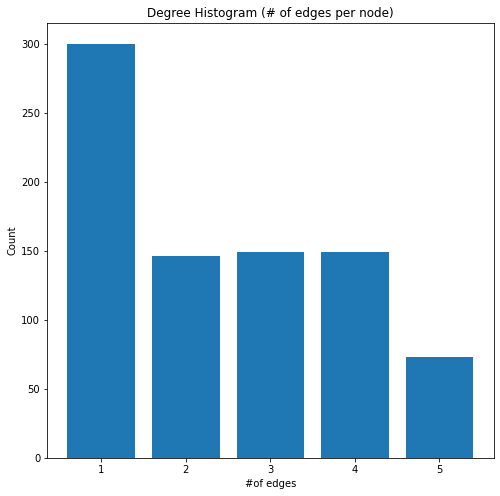

In [31]:
plt.figure(figsize=(8,8))
plt.bar(xaxis,yaxis)
plt.title('Degree Histogram (# of edges per node)')
plt.xlabel('#of edges')
plt.ylabel('Count')
plt.show()

#### Robustness

In [49]:
graphCopy = amzGraph.copy()
num = amzGraph.number_of_nodes()
numSteps = 25

numRemove = amzGraph.number_of_nodes() // numSteps
nodesRemoves = range(0, amzGraph.number_of_nodes(), numRemove)

############# Random Failure
#######################################################
randFail = []
for node in nodesRemoves:
    core = next(nx.connected_components(graphCopy))
    prop = len(core) / num
    randFail.append(prop)

    if graphCopy.number_of_nodes() > numRemove:
        remove = np.random.choice(list(graphCopy.nodes),numRemove)
        graphCopy.remove_nodes_from(remove)

############# Targeted Failure
#######################################################
graphCopy = amzGraph.copy()
targetFail = []
for node2 in nodesRemoves:
    core2 = next(nx.connected_components(graphCopy))
    prop2 = len(core2) / num
    targetFail.append(prop2)

    if graphCopy.number_of_nodes() > numRemove:
        nodesSorted = sorted(graphCopy.nodes,key=graphCopy.degree, reverse=True)
        remove2 = nodesSorted[:numRemove]
        graphCopy.remove_nodes_from(remove2)


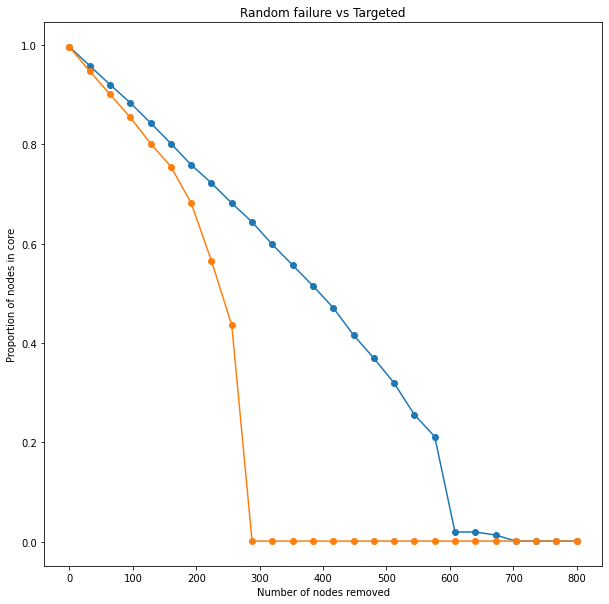

In [50]:
plt.figure(figsize=(10,10))
plt.title('Random failure vs Targeted')
plt.xlabel('Number of nodes removed')
plt.ylabel('Proportion of nodes in core')
plt.plot(nodesRemoves, randFail, marker='o',label='Random')
plt.plot(nodesRemoves, targetFail, marker='o',label='Target')
plt.show()

#### Graph Visual

In [39]:
options = {'node_size':50,'linewidths':2}

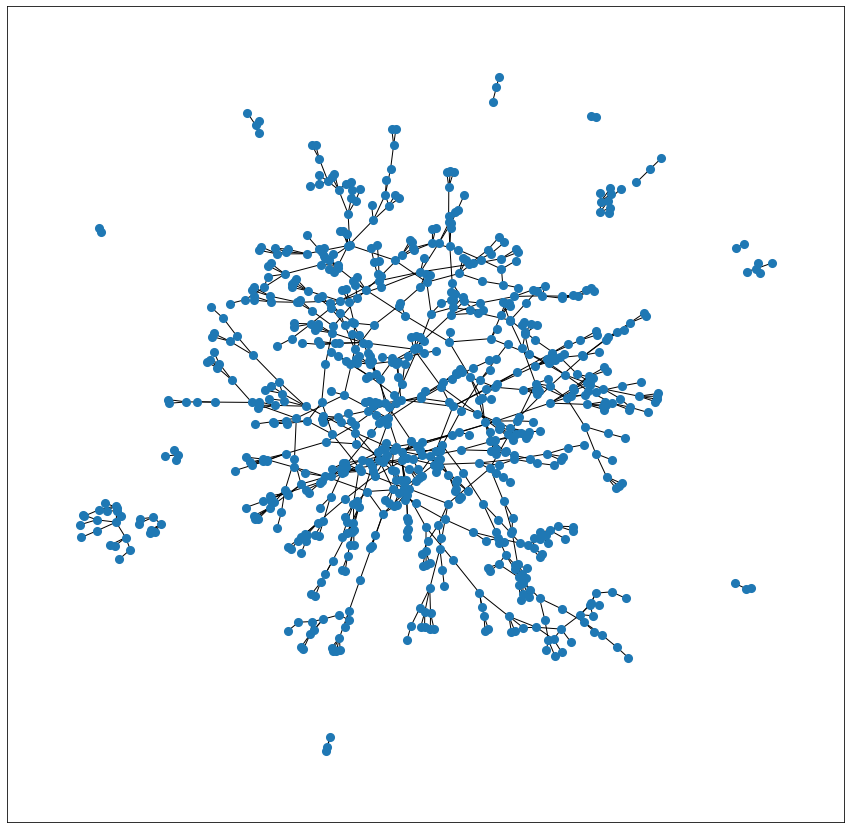

In [55]:
plt.figure(figsize=(15,15))
nx.draw_networkx(amzGraph,with_labels=False, **options)
plt.show()

## Simulation & Analysis

### Random Network Generation

Class initialization can be done with the following parameters: Base graph and string of randomnetwork:'base', 'erdos renyi', or'barbasi albert'

#### Simulation with Erdos Renyi Random Network

In [99]:
rn_renyi = RN(amzGraph, 'erdos renyi')

In [100]:
con,deg, bet  = rn_renyi.RunSimulation(simCount=10)
print('For 10 simulations with the Erdos Renyi graph we have the following metrics:')
print(f'The mean connectedness(average of the avg shortest path):\nleft: {round(con[0],2)} mean:{round(con[1],2)} right:{round(con[2],2)}')
print(f'\nThe mean degree(# of edges connected to a node):\nleft: {round(deg[0],2)} mean:{round(deg[1],2)} right:{round(deg[2],2)}')
print(f'\nThe mean betweenness(number of times a node lies on the shortest path between other nodes):\nleft: {round(bet[0],4)} mean:{round(bet[1],4)} right:{round(bet[2],4)}')

For 10 simulations with the Erdos Renyi graph we have the following metrics:
The mean connectedness(average of the avg shortest path):
left: 2.08 mean:2.19 right:2.37

The mean degree(# of edges connected to a node):
left: 2.58 mean:2.59 right:2.6

The mean betweenness(number of times a node lies on the shortest path between other nodes):
left: 0.0137 mean:0.0139 right:0.0142


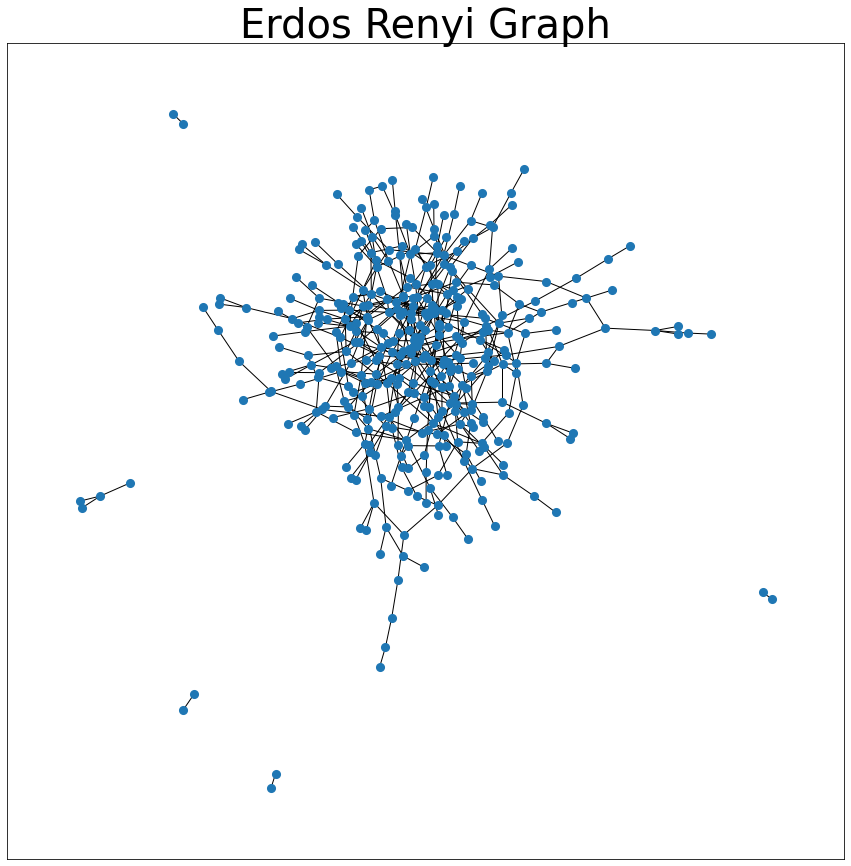

In [101]:
rn_renyi.drawGraph(rn_renyi.erdosRenyiGraph, 'Erdos Renyi Graph')

#### Simulation with Barbasi Albert Random Network

In [4]:
rn_barbasi = RN(amzGraph, 'barbasi albert')

In [5]:
con,deg, bet  = rn_barbasi.RunSimulation(simCount=10)
print('For 10 simulations with the Barbasi Albert graph we have the following metrics:')
print(f'The mean connectedness(average of the avg shortest path):\nleft: {round(con[0],2)} mean:{round(con[1],2)} right:{round(con[2],2)}')
print(f'\nThe mean degree(# of edges connected to a node):\nleft: {round(deg[0],2)} mean:{round(deg[1],2)} right:{round(deg[2],2)}')
print(f'\nThe mean betweenness(number of times a node lies on the shortest path between other nodes):\nleft: {round(bet[0],4)} mean:{round(bet[1],4)} right:{round(bet[2],4)}')

For 10 simulations with the std Amz graph we have the following metrics:
The mean connectedness(average of the avg shortest path):
left: 4.96 mean:5.15 right:5.32

The mean degree(# of edges connected to a node):
left: 1.99 mean:1.99 right:1.99

The mean betweenness(number of times a node lies on the shortest path between other nodes):
left: 0.0229 mean:0.0238 right:0.0246


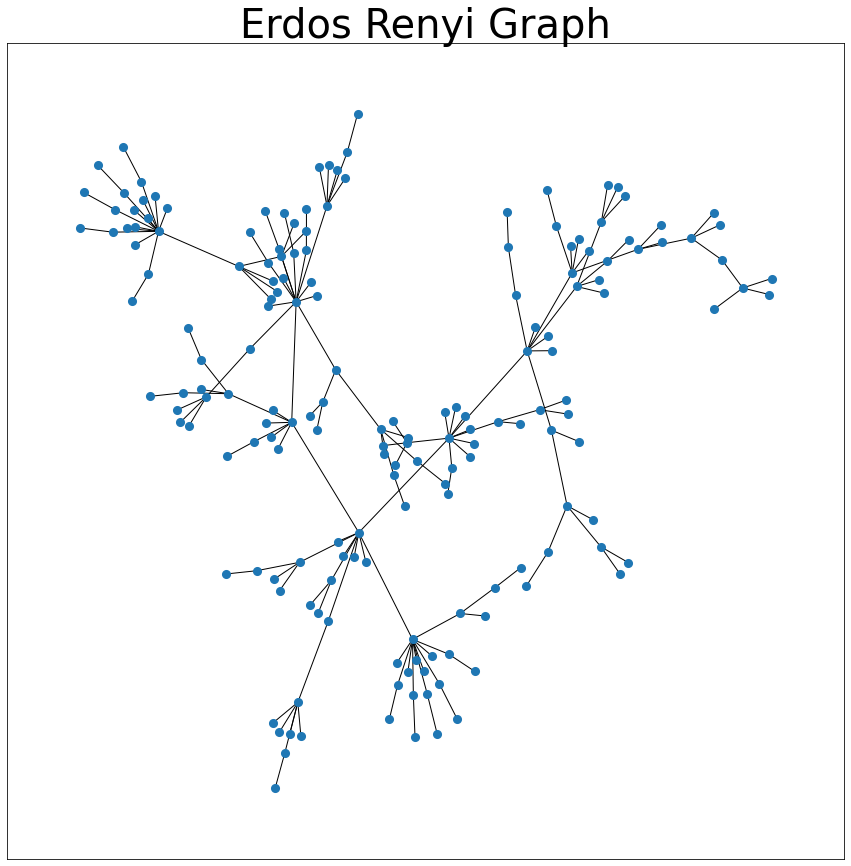

In [6]:

rn_barbasi.drawGraph(rn_barbasi.barbasiAlbertGraph, 'Erdos Renyi Graph')

### Clustering

#### Stochastic Block Model Clustering

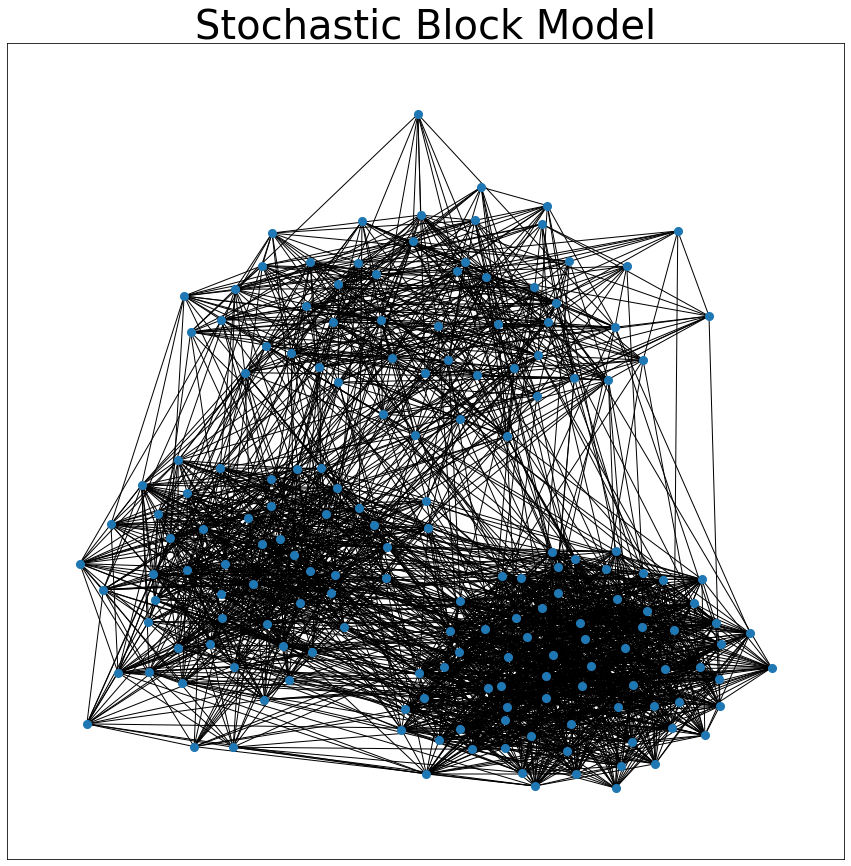

In [7]:
s = [round(len(rn_barbasi.rawgraph) * .30), round(len(rn_barbasi.rawgraph) * .30), round(len(rn_barbasi.rawgraph) * .40)]
p = [[0.25, 0.05, 0.02],
     [0.05, 0.35, 0.07],
     [0.02, 0.07, 0.40]]

rn_barbasi.stochastBlockModel(s,p)
rn_barbasi.drawGraph(rn_barbasi.SBM_Random_Network, 'Stochastic Block Model')

#### Best Partition Clustering

##### Helper functions from main RandomNetwork for easier analysis and editing

In [78]:
def createPartitionMap(partition):
    '''PARAMS: partition RETURNS: partiion map; Creates a partition map to break the network into clusters'''
    partition_map = {}
    for idx, cluster_nodes in enumerate(partition):
        for node in cluster_nodes:
            partition_map[node] = idx
    return partition_map

def girvan_newman_partition(graph, numSteps):
    '''PARAMS: graph object and # of clusters RETURNS clustered partitions that can be fed in as node colors to nx.draw(); Method of generating partitions and returns clustered partitions of network'''
    partitionList = list(nx.community.girvan_newman(graph))
    minpartition = len(list(nx.community.girvan_newman(graph))[0])
    for i in partitionList:
        if len(i) == numSteps:
            partition = i
    try:
        partitionMap = createPartitionMap(partition)
    except:
        print(f'Smallest valid partition set {minpartition}')
        partition = partitionList[numSteps - 2]
        partitionMap = createPartitionMap(partition)
        
    return [partitionMap[i] for i in graph.nodes()], partition

def drawGraph(graph,title,node_colors = None, options = {'node_size':50,'linewidths':2}):
    
    plt.figure(figsize=(15,15))
    nx.draw_networkx(graph,with_labels=False,node_color = node_colors, **options)
    plt.title(title, fontsize=40)
    plt.show()

#### Best Partition with raw network

Smallest valid partition set 18
Smallest valid partition set 18
Smallest valid partition set 18
Smallest valid partition set 18
Smallest valid partition set 18
Smallest valid partition set 18
Smallest valid partition set 18
Smallest valid partition set 18
Smallest valid partition set 18
Smallest valid partition set 18
Smallest valid partition set 18
Smallest valid partition set 18
Smallest valid partition set 18
Smallest valid partition set 18
Smallest valid partition set 18
Smallest valid partition set 18
Smallest valid partition set 18


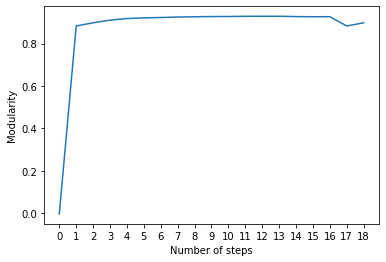

In [102]:
ls_raw=[]
for i in range(1,20):
    nodeColor, partition = girvan_newman_partition(amzGraph, i)
    mod = nx.community.quality.modularity(amzGraph,partition)
    ls_raw.append(mod)

plt.plot(ls_raw)
plt.xticks(range(19))
plt.ylabel('Modularity')
plt.xlabel('Number of steps')
plt.show()

In [103]:
a = zip(ls_raw,range(1,20))
b = list(max(a))
print(f'Best number of steps for optimal modularity(clustering): {b[1]}\nwith Modularity of {b[0]}')

Best number of steps for optimal modularity(clustering): 13
with Modularity of 0.9291940000000002


Smallest valid partition set 18


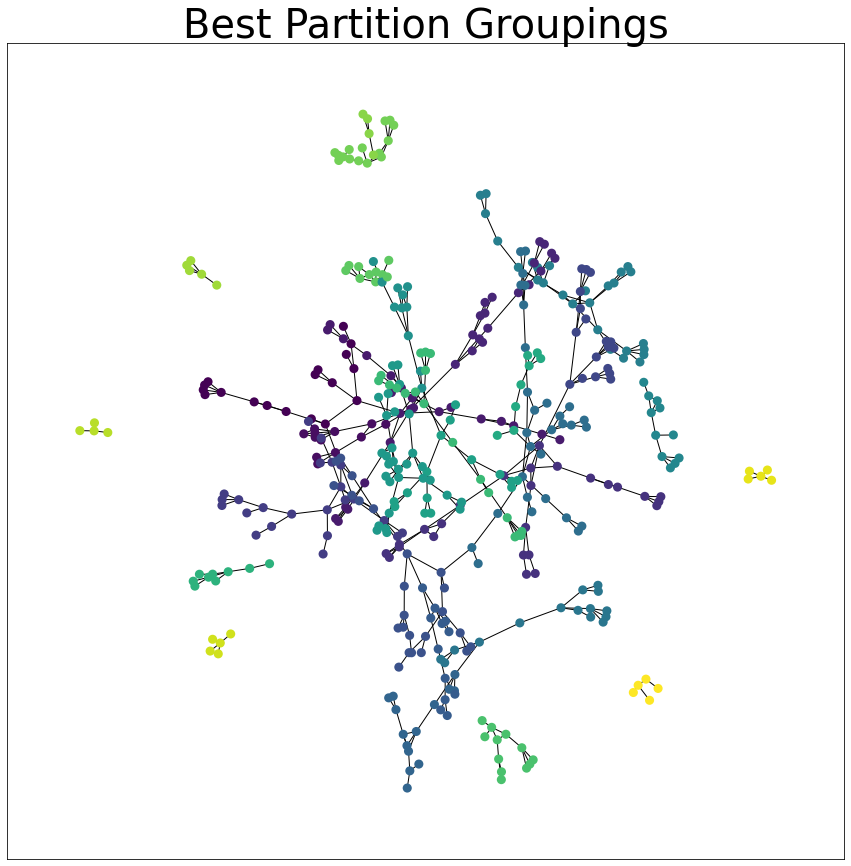

In [104]:
nodeColor, part = girvan_newman_partition(amzGraph, 13)
drawGraph(amzGraph,'Best Partition Groupings',node_colors=nodeColor)

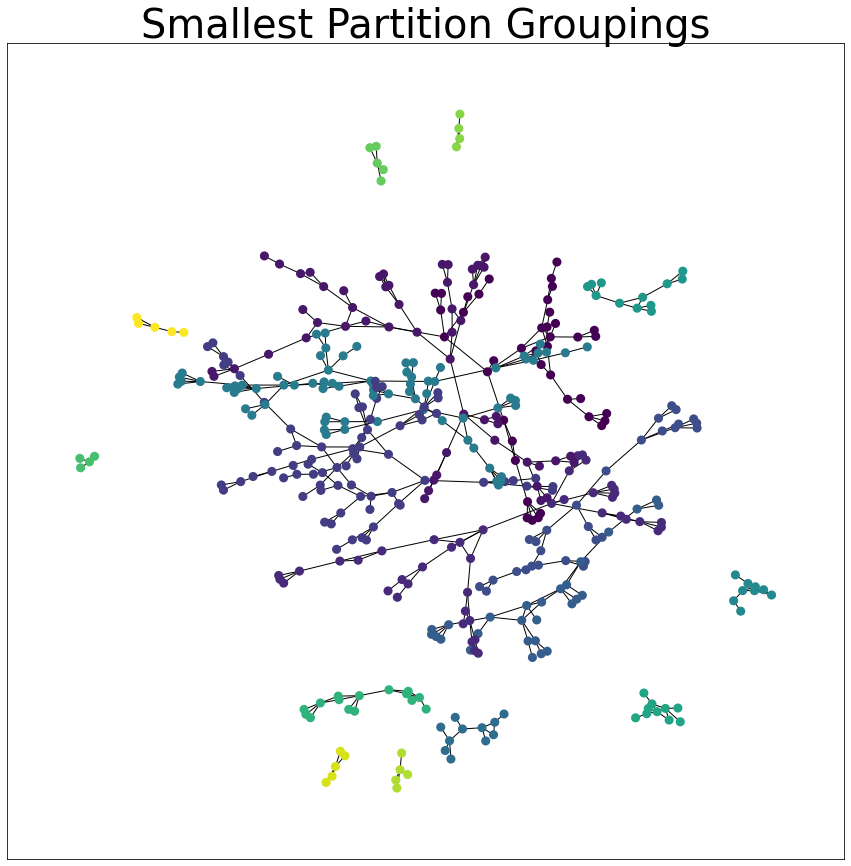

In [105]:
nodeColor2, partition2 = girvan_newman_partition(amzGraph, 18)
drawGraph(amzGraph,'Smallest Partition Groupings',node_colors=nodeColor2)

#### Best Partition with Erdos Renyi Random Network

Smallest valid partition set 7
Smallest valid partition set 7
Smallest valid partition set 7
Smallest valid partition set 7
Smallest valid partition set 7
Smallest valid partition set 7


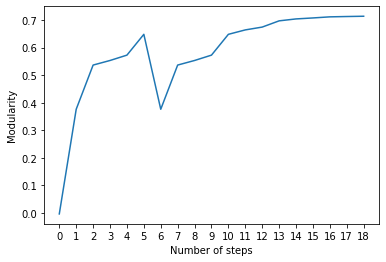

In [107]:
ls_er=[]
for i in range(1,20):
    nodeColor, partition = girvan_newman_partition(rn_renyi.erdosRenyiGraph, i)
    mod = nx.community.quality.modularity(rn_renyi.erdosRenyiGraph,partition)
    ls_er.append(mod)

plt.plot(ls_er)
plt.xticks(range(19))
plt.ylabel('Modularity')
plt.xlabel('Number of steps')
plt.show()

In [109]:
a = zip(ls_er,range(1,20))
b = list(max(a))
print(f'Best number of steps for optimal modularity(clustering): {b[1]}\nwith Modularity of {b[0]}')

Best number of steps for optimal modularity(clustering): 19
with Modularity of 0.7135319999999999


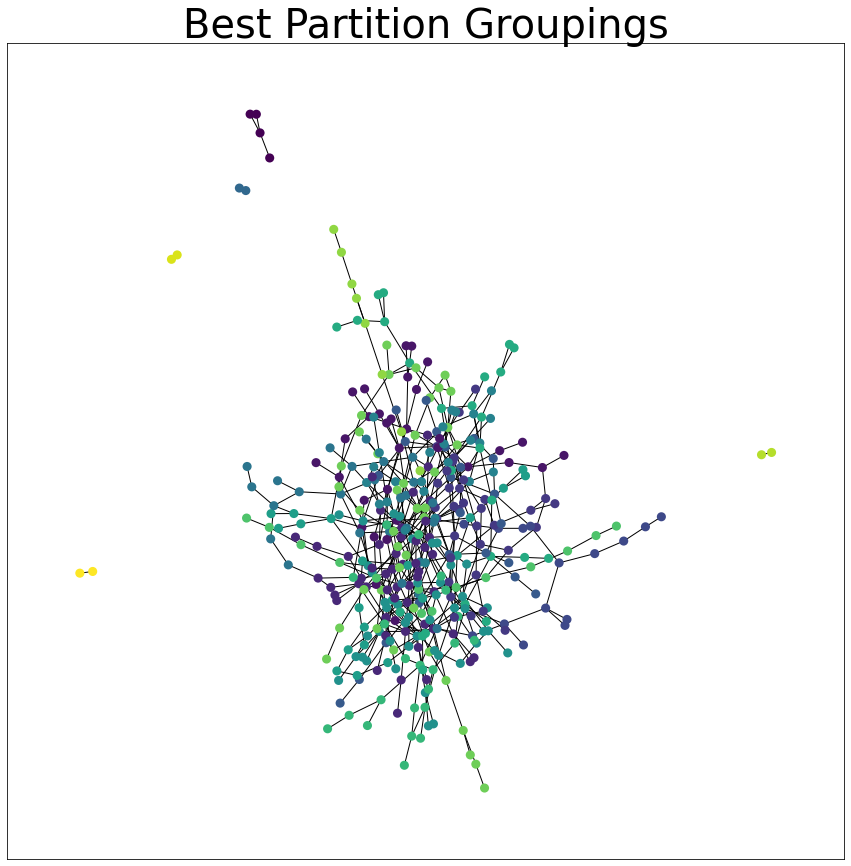

In [110]:
nodeColor3, partition3 = girvan_newman_partition(rn_renyi.erdosRenyiGraph, 19)
drawGraph(rn_renyi.erdosRenyiGraph,'Best Partition Groupings',node_colors=nodeColor3)

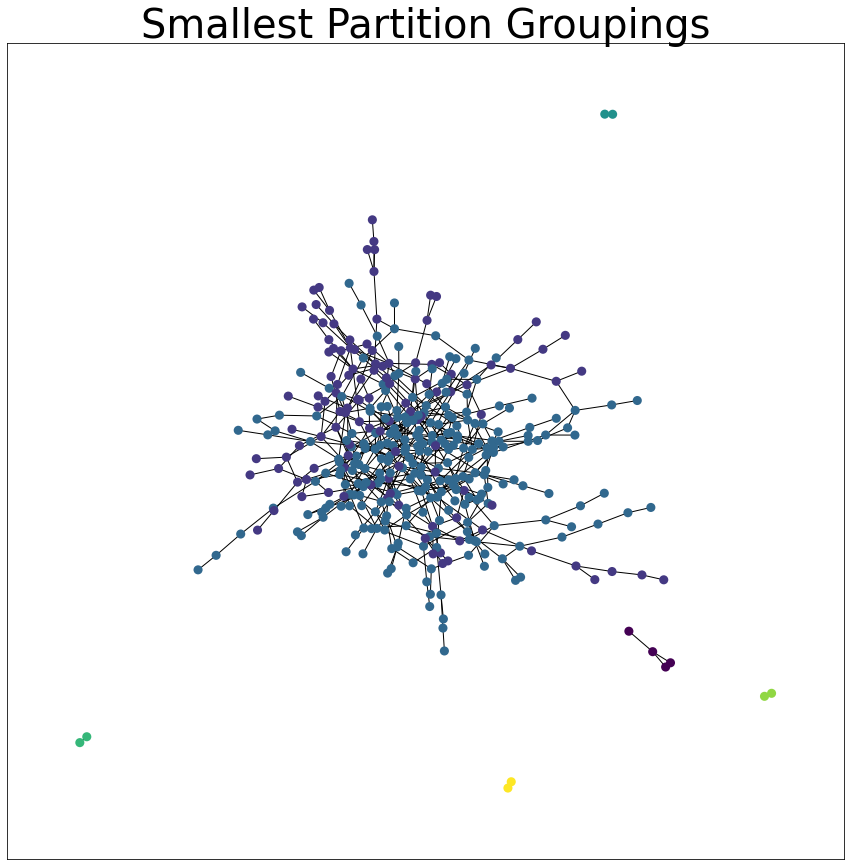

In [111]:
nodeColor4, partition3 = girvan_newman_partition(rn_renyi.erdosRenyiGraph, 7)
drawGraph(rn_renyi.erdosRenyiGraph,'Smallest Partition Groupings',node_colors=nodeColor4)

## Bibliography

* https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience/tree/master/tutorials